In [14]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_logistica as sl

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

import pickle

import warnings
warnings.filterwarnings("ignore")

# Ajuste logistica

In [15]:
data_pickle = pd.read_pickle("datos/data_final_encoded.pkl")
df = pd.DataFrame(data_pickle)
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Education_1,Education_2,Education_3,Education_4,Education_5,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,PerformanceRating_3,PerformanceRating_4,Attrition
0,0.785714,0.411411,0.000000,0.178571,0.180855,0.272843,0.154771,0.637546,0.111111,0.000000,0.025,1.000000,0.025,0.000000,0.000000,0.015670,0.000000,0.148612,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.309524,1.000000,0.045611,0.321429,0.180855,0.559647,1.000000,0.167457,0.000000,0.857143,0.150,0.500000,0.125,0.066667,0.235294,0.015670,0.439334,0.210441,0.106443,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.333333,1.000000,0.045611,0.571429,0.028357,0.459020,0.154771,0.964666,0.111111,0.285714,0.125,0.333333,0.125,0.000000,0.176471,0.122055,0.439334,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.476190,0.000000,0.045611,0.035714,0.180855,0.190874,0.154771,0.385045,0.333333,0.000000,0.325,0.833333,0.200,0.466667,0.294118,0.000000,0.000000,0.000000,0.106443,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.333333,0.411411,0.045611,0.321429,0.163705,0.459020,1.000000,0.070195,0.444444,0.071429,0.225,0.333333,0.150,0.000000,0.235294,0.000000,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
soporte = sl.AnalisisModelosClasificacion(df, "Attrition")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

,train,test
accuracy,0.765258,0.754693
precision,0.766408,0.756464
recall,0.765258,0.754693
f1,0.764962,0.754474
kappa,0.530392,0.509834
auc,0.837197,0.834852


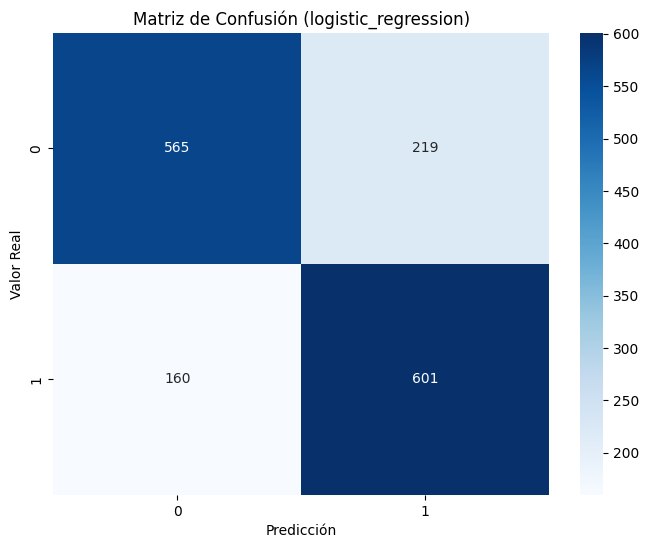

In [17]:
soporte.plot_matriz_confusion("logistic_regression")

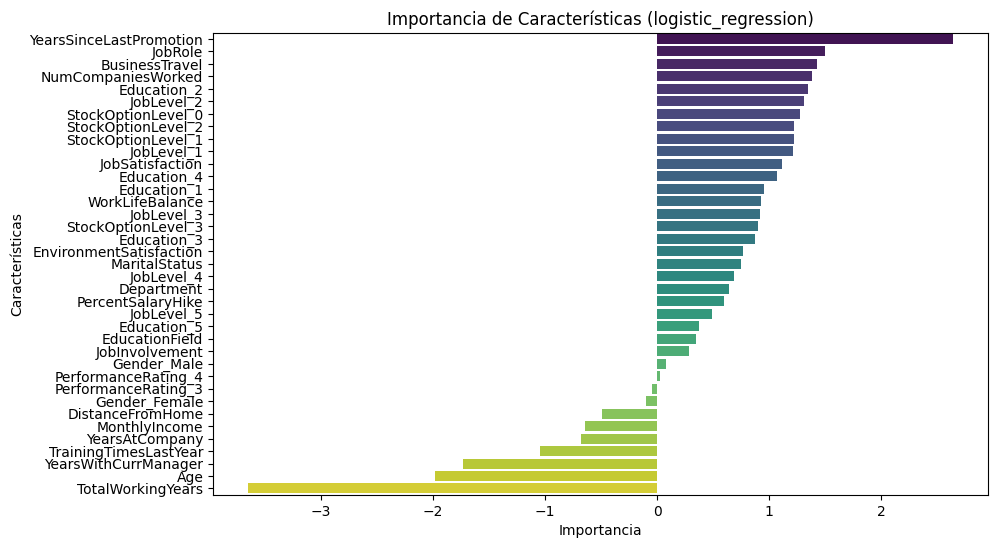

In [18]:
soporte.importancia_predictores("logistic_regression")

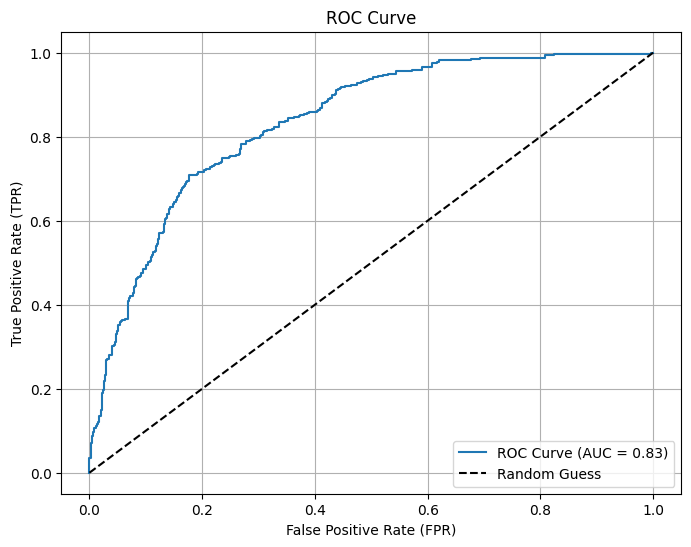

In [19]:
soporte.hacer_roc_curve("logistic_regression")

In [20]:
# df.to_pickle("datos/financial_data_target_ajustado.pkl")

In [21]:
# df.drop(columns=["customer_age"], inplace=True)
# soporte = sl.AnalisisModelosClasificacion(df, "is_fraudulent")
# soporte.ajustar_modelo("logistic_regression")
# soporte.calcular_metricas("logistic_regression")

In [22]:
# soporte.plot_matriz_confusion("logistic_regression")

# Conclusiones
He eliminado las columnas = ["transaction_id", "customer_id", "merchant_id", "amount", "transaction_time", "transaction_description"] porque son columnas que no son importantes y se me olvido quitarlas en el preprocesamiento.

Tengo un modelo que tiene 0.07 en el kappa pero 0.54 en AUC. El kappa me da a entender que la prediccion es pesima y el auc me da a entender que predecimmos al azar.

# Logistica ensamble

In [23]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_logistica_ensamble as sle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

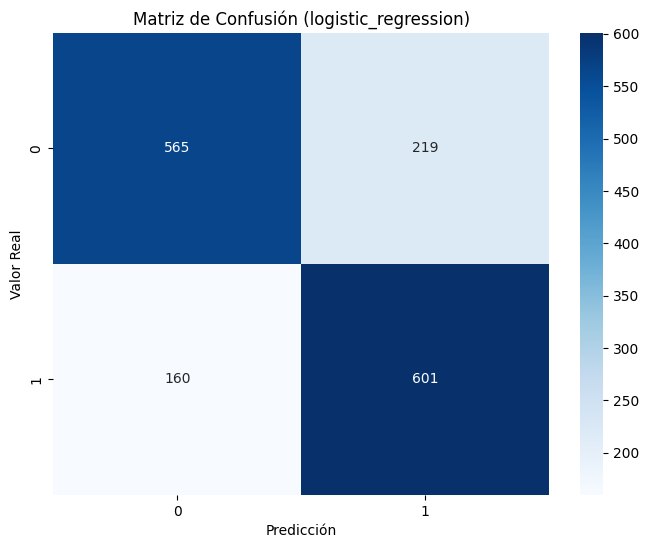

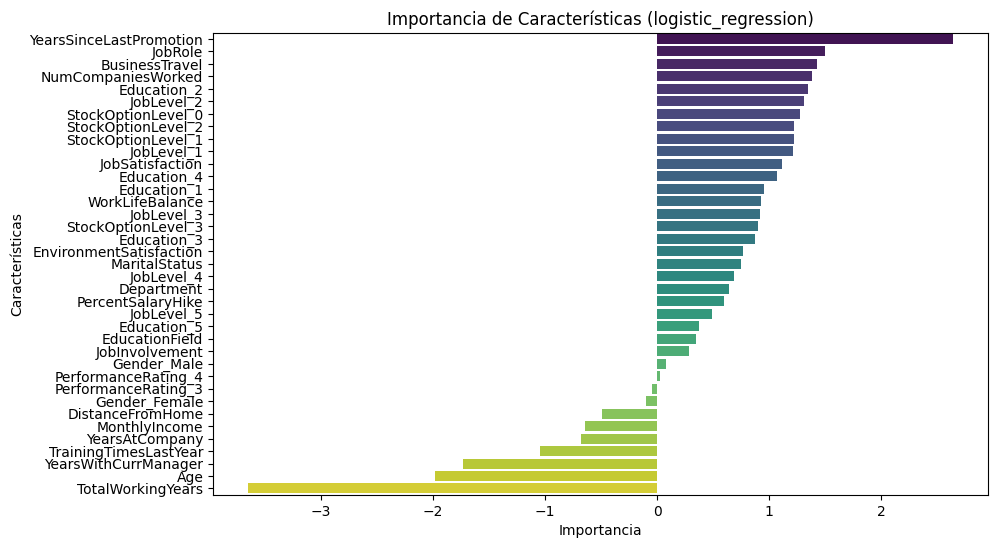

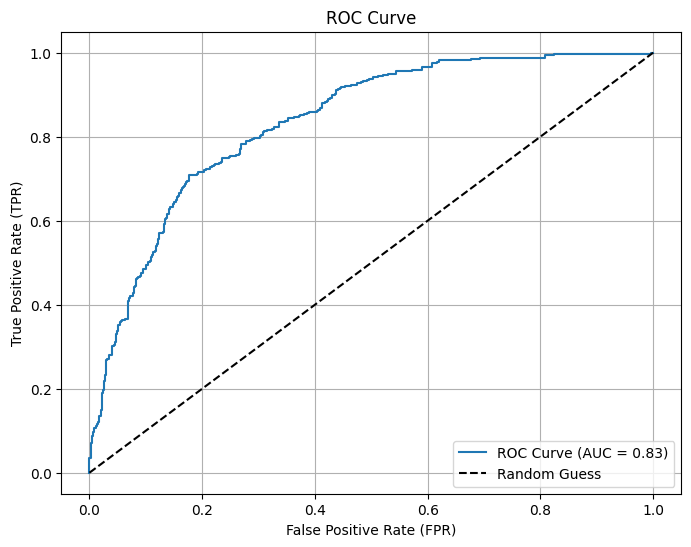

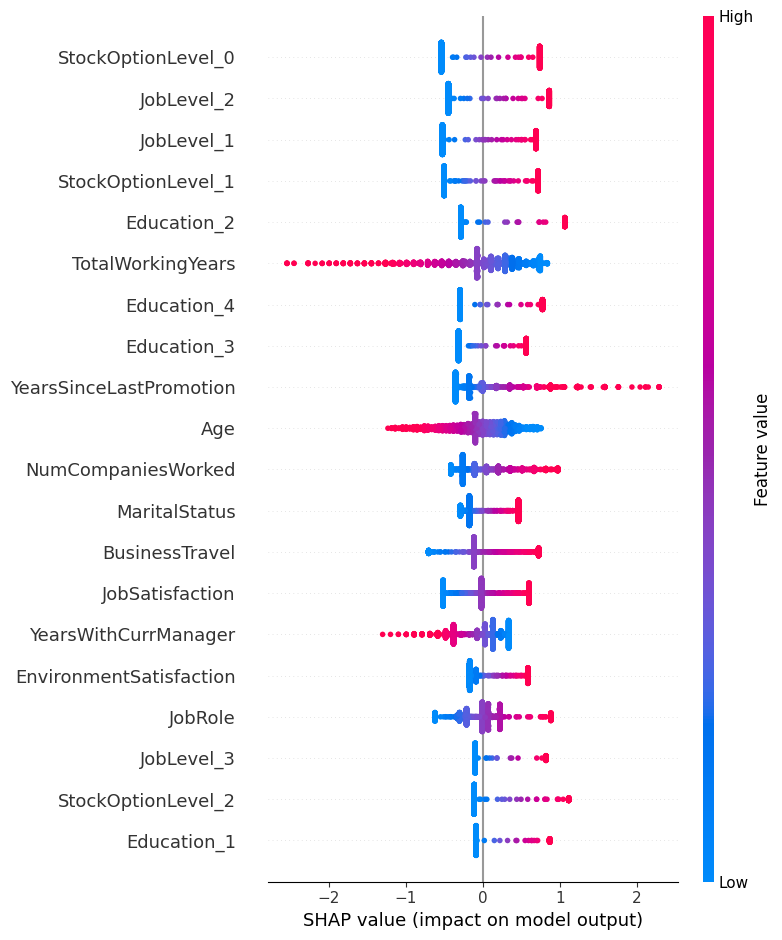

,train,test
accuracy,0.765258,0.754693
precision,0.766408,0.756464
recall,0.765258,0.754693
f1,0.764962,0.754474
kappa,0.530392,0.509834
auc,0.837197,0.834852
time_seconds,0.001997,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.001997


El mejor modelo es DecisionTreeClassifier(max_depth=10)


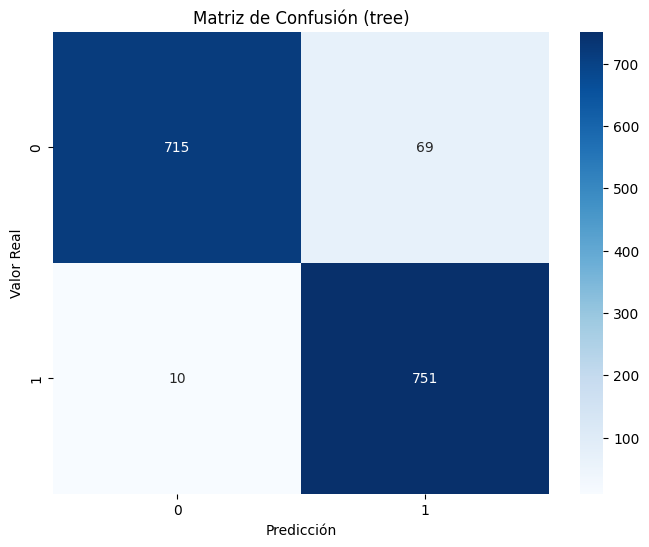

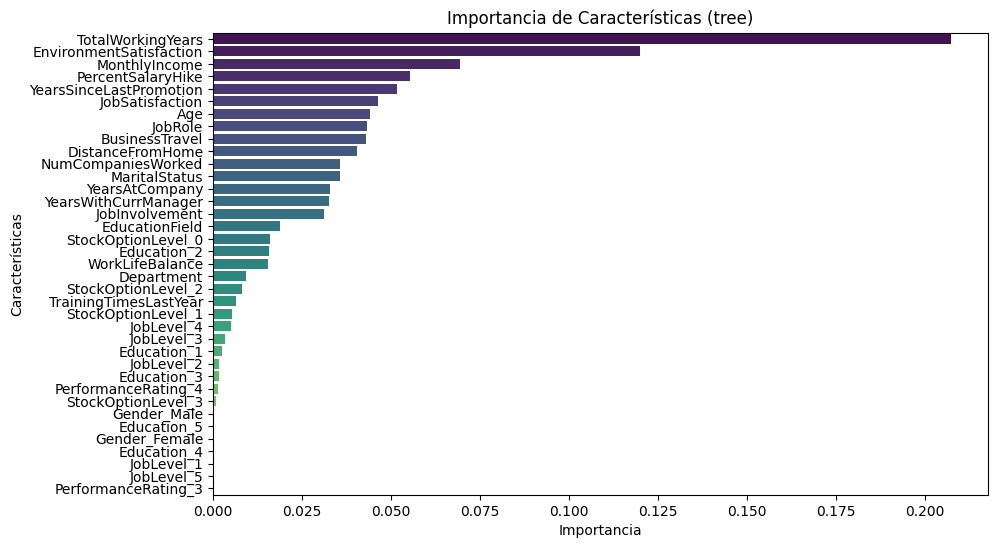

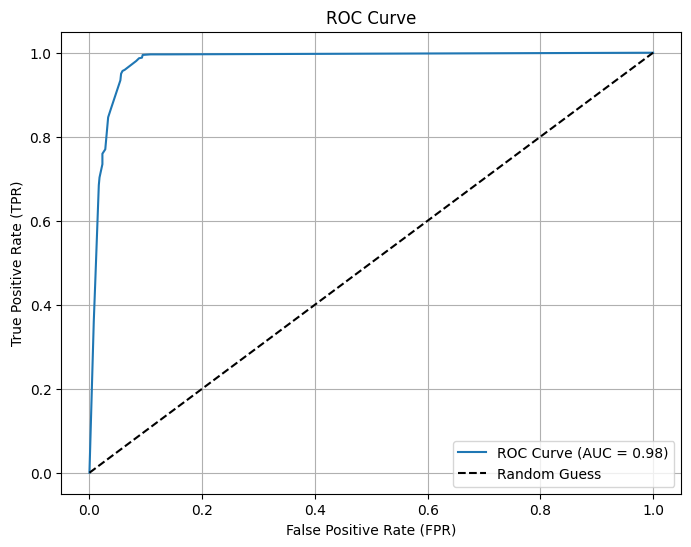

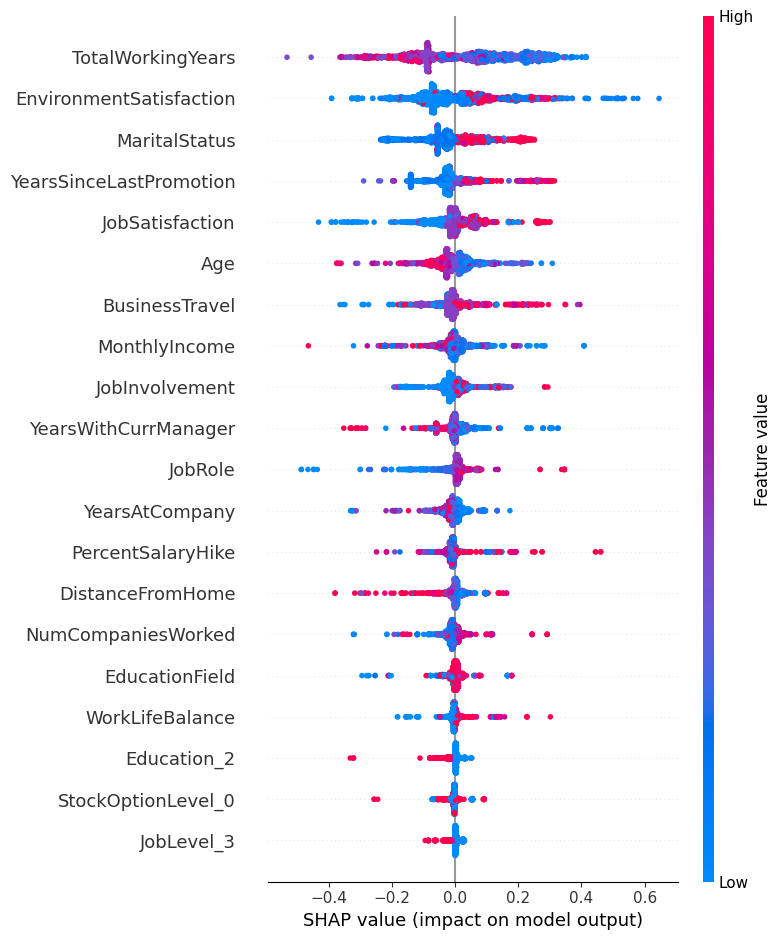

,train,test,train,test
accuracy,0.765258,0.754693,0.972964,0.948867
precision,0.766408,0.756464,0.973813,0.951554
recall,0.765258,0.754693,0.972964,0.948867
f1,0.764962,0.754474,0.97295,0.948822
kappa,0.530392,0.509834,0.945919,0.897828
auc,0.837197,0.834852,0.992473,0.980067
time_seconds,0.001997,NaN,0.001506,NaN
n_jobs,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree
tiempo_computacion(segundos),NaN,0.001997,NaN,0.001506


El mejor modelo es RandomForestClassifier(max_depth=20, min_samples_split=5)


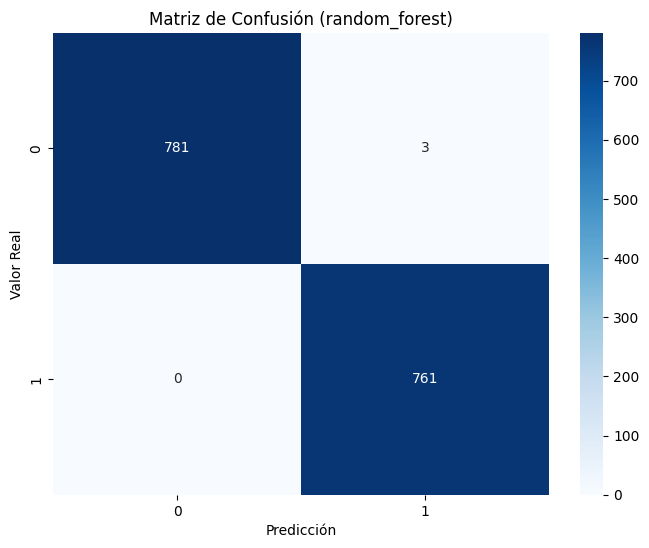

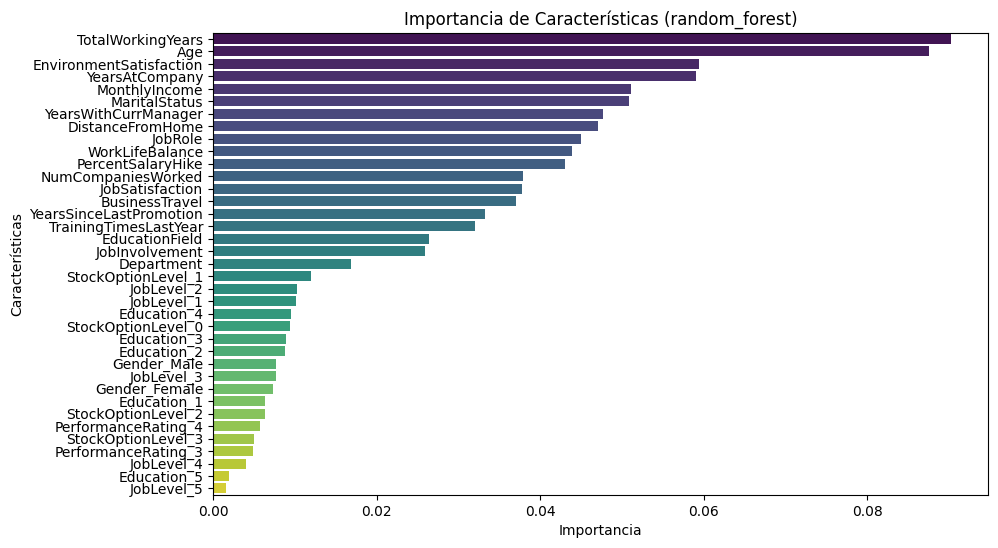

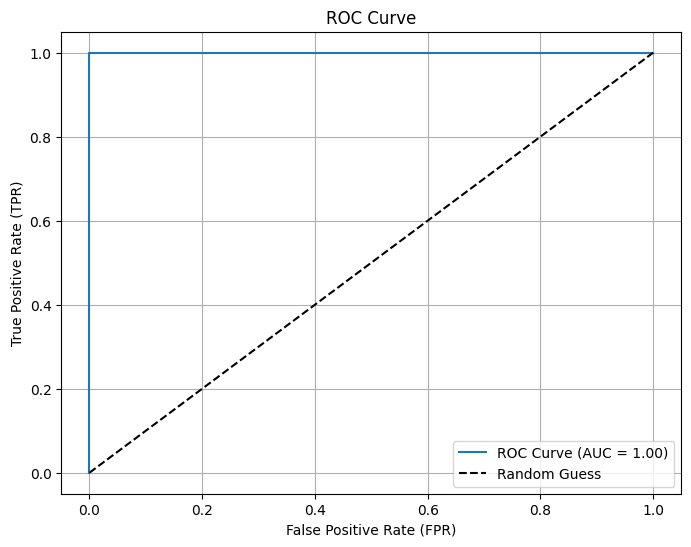

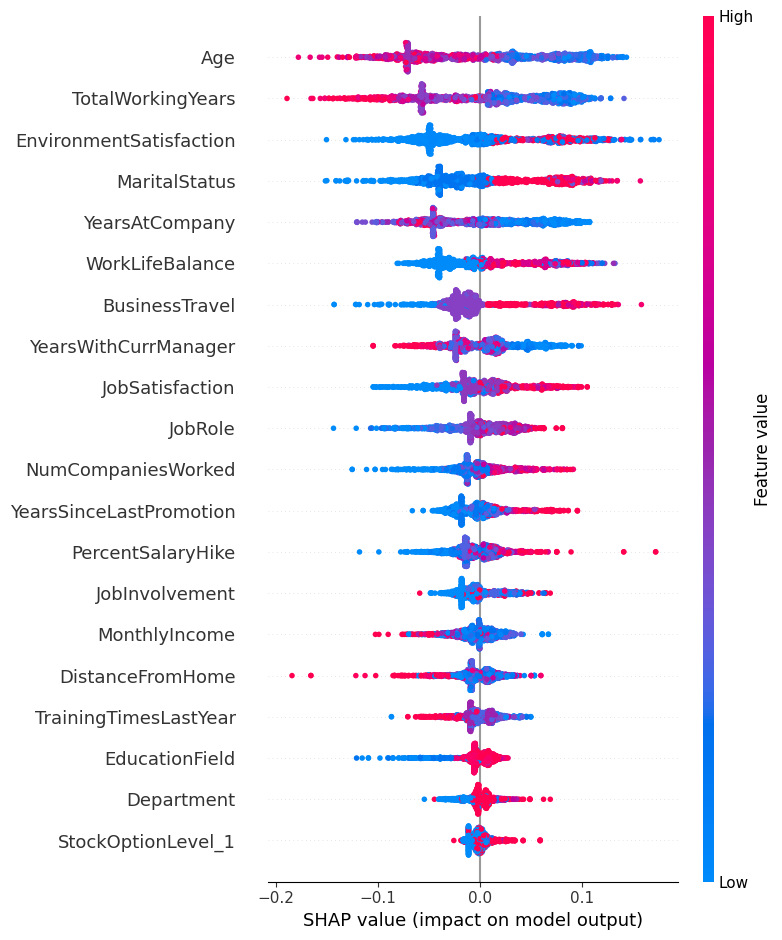

,train,test,train,test,train,test
accuracy,0.765258,0.754693,0.972964,0.948867,1.0,0.998058
precision,0.766408,0.756464,0.973813,0.951554,1.0,0.998066
recall,0.765258,0.754693,0.972964,0.948867,1.0,0.998058
f1,0.764962,0.754474,0.97295,0.948822,1.0,0.998058
kappa,0.530392,0.509834,0.945919,0.897828,1.0,0.996116
auc,0.837197,0.834852,0.992473,0.980067,1.0,0.999995
time_seconds,0.001997,NaN,0.001506,NaN,0.047207,NaN
n_jobs,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest
tiempo_computacion(segundos),NaN,0.001997,NaN,0.001506,NaN,0.047207


El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)


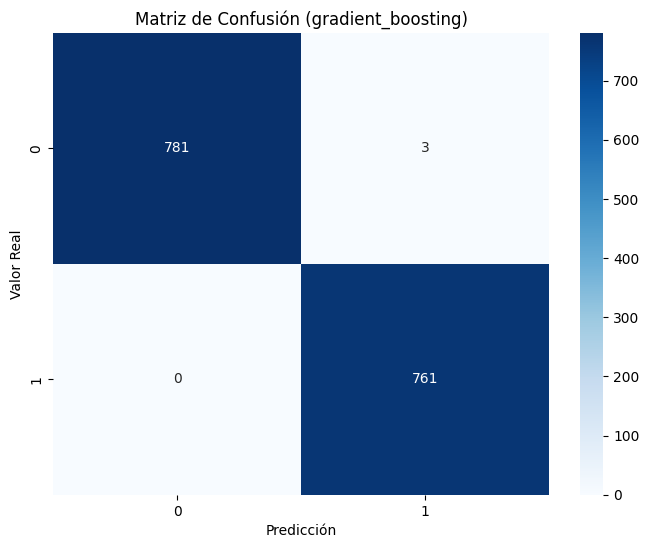

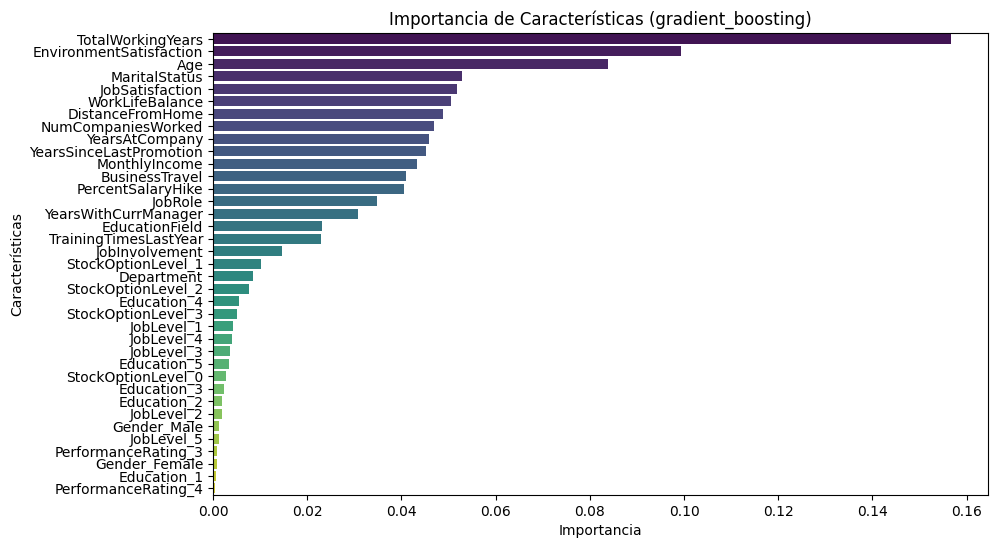

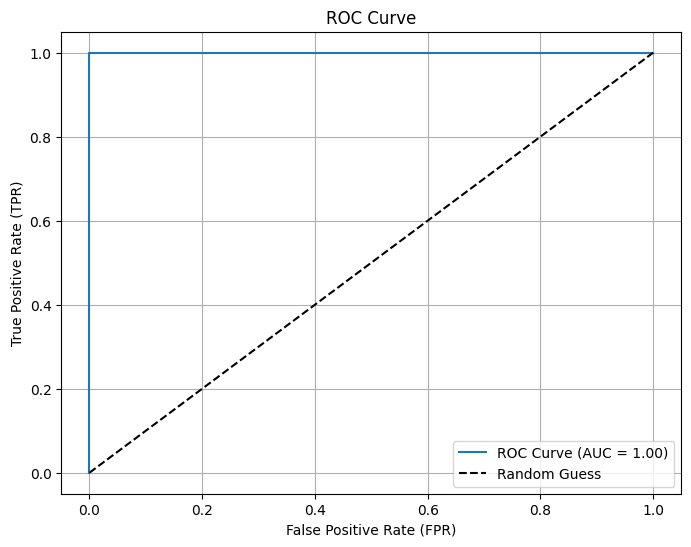

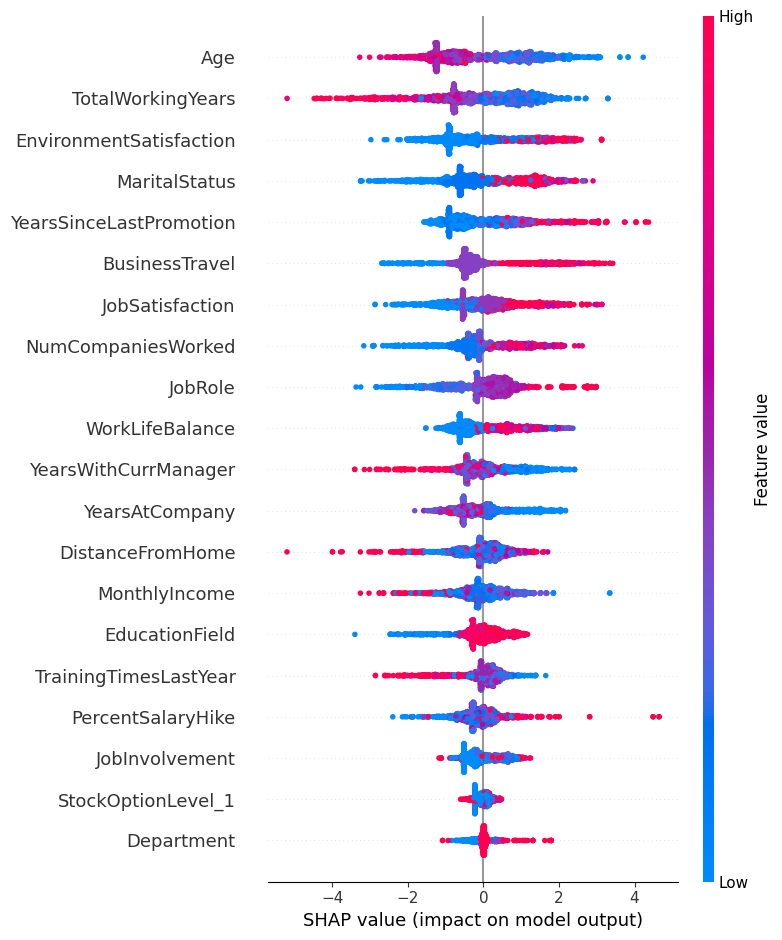

,train,test,train,test,train,test,train,test
accuracy,0.765258,0.754693,0.972964,0.948867,1.0,0.998058,1.0,0.998058
precision,0.766408,0.756464,0.973813,0.951554,1.0,0.998066,1.0,0.998066
recall,0.765258,0.754693,0.972964,0.948867,1.0,0.998058,1.0,0.998058
f1,0.764962,0.754474,0.97295,0.948822,1.0,0.998058,1.0,0.998058
kappa,0.530392,0.509834,0.945919,0.897828,1.0,0.996116,1.0,0.996116
auc,0.837197,0.834852,0.992473,0.980067,1.0,0.999995,1.0,1.0
time_seconds,0.001997,NaN,0.001506,NaN,0.047207,NaN,0.02811,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.001997,NaN,0.001506,NaN,0.047207,NaN,0.02811


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


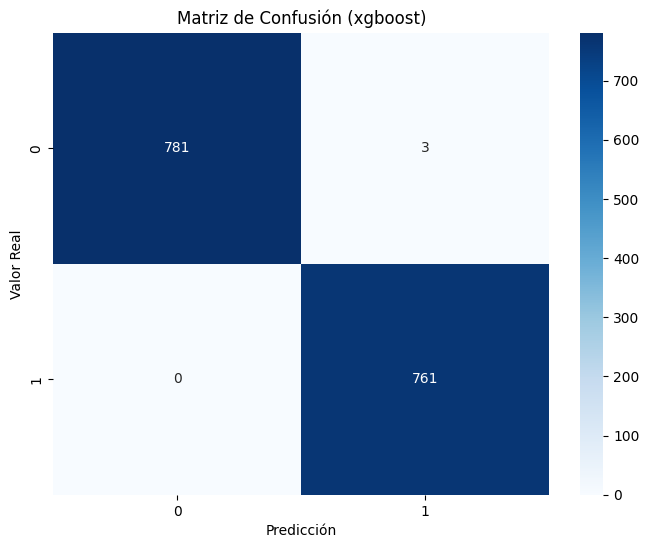

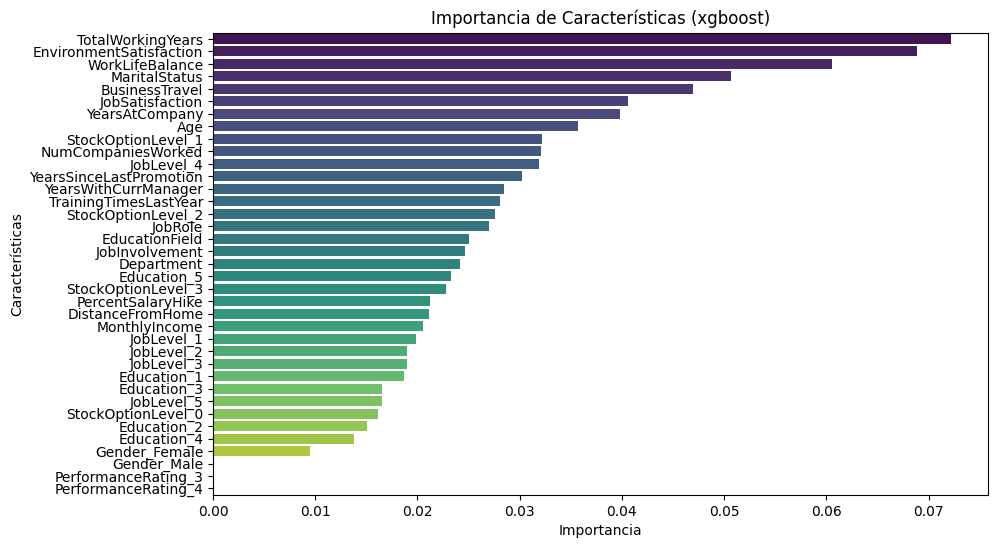

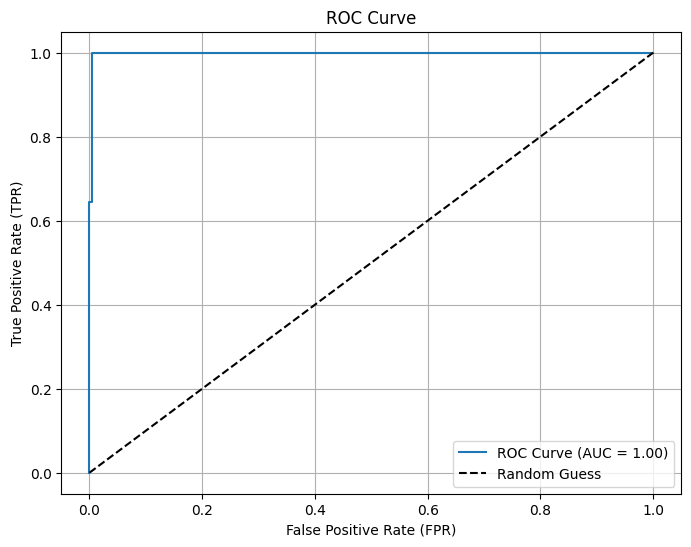

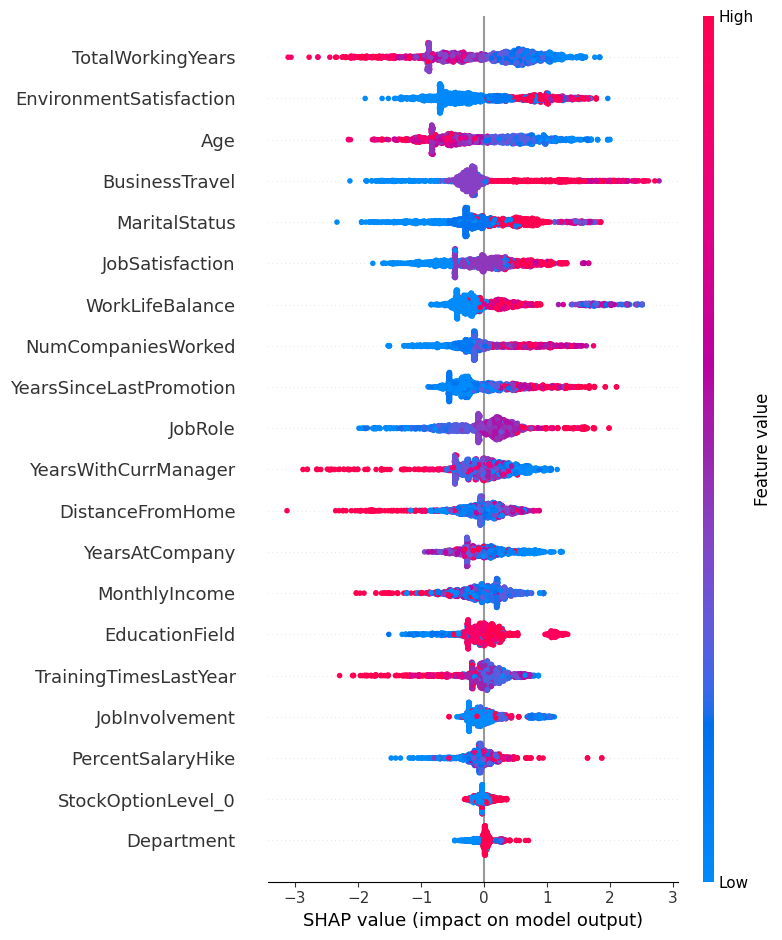

,train,test,train,test,train,test,train,test,train,test
accuracy,0.765258,0.754693,0.972964,0.948867,1.0,0.998058,1.0,0.998058,1.0,0.998058
precision,0.766408,0.756464,0.973813,0.951554,1.0,0.998066,1.0,0.998066,1.0,0.998066
recall,0.765258,0.754693,0.972964,0.948867,1.0,0.998058,1.0,0.998058,1.0,0.998058
f1,0.764962,0.754474,0.97295,0.948822,1.0,0.998058,1.0,0.998058,1.0,0.998058
kappa,0.530392,0.509834,0.945919,0.897828,1.0,0.996116,1.0,0.996116,1.0,0.996116
auc,0.837197,0.834852,0.992473,0.980067,1.0,0.999995,1.0,1.0,1.0,0.998637
time_seconds,0.001997,NaN,0.001506,NaN,0.047207,NaN,0.02811,NaN,0.011509,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting,xgboost,xgboost
tiempo_computacion(segundos),NaN,0.001997,NaN,0.001506,NaN,0.047207,NaN,0.02811,NaN,0.011509


,accuracy,precision,recall,f1,kappa
train,0.765258,0.766408,0.765258,0.764962,0.530392
test,0.754693,0.756464,0.754693,0.754474,0.509834
train,0.972964,0.973813,0.972964,0.97295,0.945919
test,0.948867,0.951554,0.948867,0.948822,0.897828
train,1.0,1.0,1.0,1.0,1.0
test,0.998058,0.998066,0.998058,0.998058,0.996116
train,1.0,1.0,1.0,1.0,1.0
test,0.998058,0.998066,0.998058,0.998058,0.996116
train,1.0,1.0,1.0,1.0,1.0
test,0.998058,0.998066,0.998058,0.998058,0.996116


In [24]:
lista_modelos = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_metricas = pd.DataFrame()
soporte = sle.AnalisisModelosClasificacion(df, "Attrition")
for modelo in lista_modelos:
    # soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
    soporte.ajustar_modelo(modelo)
    df_temp = soporte.calcular_metricas(modelo)
    df_metricas = pd.concat([df_metricas, df_temp], axis=1)
    soporte.plot_matriz_confusion(modelo)
    soporte.importancia_predictores(modelo)
    soporte.hacer_roc_curve(modelo)
    soporte.plot_shap_summary(modelo)
    display(df_metricas)
df_metricas.head().T

In [25]:
df_resultados_colores = df_metricas.T.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sle.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
0,0.765258,0.766408,0.765258,0.764962,0.530392,0.837197,0.001997,None,logistic_regression,nan,nan
1,0.754693,0.756464,0.754693,0.754474,0.509834,0.834852,nan,nan,logistic_regression,0.001997,None
2,0.972964,0.973813,0.972964,0.972950,0.945919,0.992473,0.001506,16,tree,nan,nan
3,0.948867,0.951554,0.948867,0.948822,0.897828,0.980067,nan,nan,tree,0.001506,16
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.047207,None,random_forest,nan,nan
5,0.998058,0.998066,0.998058,0.998058,0.996116,0.999995,nan,nan,random_forest,0.047207,None
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.028110,16,gradient_boosting,nan,nan
7,0.998058,0.998066,0.998058,0.998058,0.996116,1.000000,nan,nan,gradient_boosting,0.028110,16
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.011509,None,xgboost,nan,nan
9,0.998058,0.998066,0.998058,0.998058,0.996116,0.998637,nan,nan,xgboost,0.011509,None


In [26]:
df_metricas.T

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
train,0.765258,0.766408,0.765258,0.764962,0.530392,0.837197,0.001997,None,logistic_regression,NaN,NaN
test,0.754693,0.756464,0.754693,0.754474,0.509834,0.834852,NaN,NaN,logistic_regression,0.001997,None
train,0.972964,0.973813,0.972964,0.97295,0.945919,0.992473,0.001506,16,tree,NaN,NaN
test,0.948867,0.951554,0.948867,0.948822,0.897828,0.980067,NaN,NaN,tree,0.001506,16
train,1.0,1.0,1.0,1.0,1.0,1.0,0.047207,None,random_forest,NaN,NaN
test,0.998058,0.998066,0.998058,0.998058,0.996116,0.999995,NaN,NaN,random_forest,0.047207,None
train,1.0,1.0,1.0,1.0,1.0,1.0,0.02811,16,gradient_boosting,NaN,NaN
test,0.998058,0.998066,0.998058,0.998058,0.996116,1.0,NaN,NaN,gradient_boosting,0.02811,16
train,1.0,1.0,1.0,1.0,1.0,1.0,0.011509,None,xgboost,NaN,NaN
test,0.998058,0.998066,0.998058,0.998058,0.996116,0.998637,NaN,NaN,xgboost,0.011509,None
